In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_name = 'A3a_data_set_1'
df = pd.read_csv(f'data/{file_name}.csv', usecols = ['Mass(g)','Extension(cm)'])
df = df.drop(0)
df = df.rename(columns={'Mass(g)':'x','Extension(cm)':'y'})
df['x'] = df['x']/1000
df['y'] = df['y']/100
df['x^2'] = round(df['x']**2,6)
df['xy'] = round(df['x']*df['y'],5)
print(df)
#df.to_csv(f'data/{file_name}_lsf.csv')


       x     y     x^2      xy
1   0.05  0.09  0.0025  0.0045
2   0.06  0.10  0.0036  0.0060
3   0.07  0.12  0.0049  0.0084
4   0.08  0.14  0.0064  0.0112
5   0.10  0.17  0.0100  0.0170
6   0.12  0.20  0.0144  0.0240
7   0.14  0.24  0.0196  0.0336
8   0.16  0.27  0.0256  0.0432
9   0.18  0.30  0.0324  0.0540
10  0.20  0.33  0.0400  0.0660


(1.632045088566825, 0.0066827697262483166, 0.022736, 0.013455999999999997, 0.015940000000000003, 0.02679)


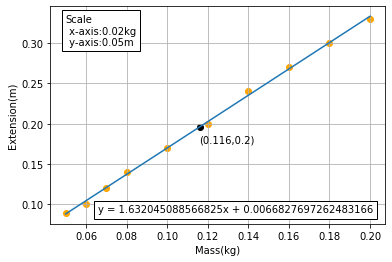

In [2]:
def lsf(x,y):
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    x_sq_bar = np.mean([i**2 for i in x])
    x_bar_sq = x_bar**2
    xy = []
    for i in range(len(x)):
        xy.append(x[i]*y[i])
    xy_bar = np.mean(xy)
    x_bar_y_bar = x_bar*y_bar
    m = (xy_bar - x_bar_y_bar)/(x_sq_bar - x_bar_sq)
    c = y_bar - m*x_bar
    return m,c,x_bar*y_bar,x_bar_sq,x_sq_bar,xy_bar

def data_plot(m,c,x_pt,y_pt,x_label,y_label,fig_name):
    x_bar = np.mean(x_pt)
    y_bar = np.mean(y_pt)
    x = x_pt
    y = [m*i + c for i in x_pt]
    plt.plot(x,y)
    plt.scatter(x_pt,y_pt,c='orange')
    plt.scatter(x_bar,y_bar,c='black')
    plt.text(x_bar, y_bar*0.9, f'({round(x_bar,3)},{round(y_bar,2)})')
    t1 = plt.text(min(x_pt), max(y_pt)*0.9, f'Scale\n x-axis:0.02kg\n y-axis:0.05m')
    t1.set_bbox(dict(facecolor='white', edgecolor='black'))
    t2= plt.text(max(x_pt)*0.33, min(y_pt), f'y = {m}x + {c}')
    t2.set_bbox(dict(facecolor='white', edgecolor='black'))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.savefig(f'data/{fig_name}.png')
    plt.show()

x_list = df['x'].tolist()
y_list = df['y'].tolist() 
lsf_line = lsf(x_list,y_list)
print(lsf_line)
m = lsf_line[0]
c = lsf_line[1]
data_plot(m,c,x_list,y_list,'Mass(kg)','Extension(m)',file_name)

In [75]:
err_table = pd.DataFrame(columns=['x','y','y^p','e','e^2'])
err_table['x'] = df['x']
err_table['y'] = df['y']
err_table['y^p'] = c + m*df['x']
err_table['e'] = err_table['y'] - err_table['y^p']
err_table['e^2'] = err_table['e']**2
print(err_table)
print('Sum of e:',err_table['e'].sum())
#err_table.to_csv(f'data/{file_name}_err.csv')

       x     y       y^p         e           e^2
1   0.05  0.09  0.088285  0.001715  2.941142e-06
2   0.06  0.10  0.104605 -0.004605  2.121040e-05
3   0.07  0.12  0.120926 -0.000926  8.573388e-07
4   0.08  0.14  0.137246  0.002754  7.582441e-06
5   0.10  0.17  0.169887  0.000113  1.270612e-08
6   0.12  0.20  0.202528 -0.002528  6.391696e-06
7   0.14  0.24  0.235169  0.004831  2.333777e-05
8   0.16  0.27  0.267810  0.002190  4.796171e-06
9   0.18  0.30  0.300451 -0.000451  2.032979e-07
10  0.20  0.33  0.333092 -0.003092  9.559150e-06
Sum of e: -1.6653345369377348e-16


In [ ]:
n = len(df['x'])

x_sq_bar = np.mean([i**2 for i in x_list])
x_bar_sq = np.mean(x_list)**2

err_y = err_table['e^2'].sum()/(n-2)
err_c_sq = (x_sq_bar*(err_y**2))/(n*(x_sq_bar-x_bar_sq))
err_m_sq = (err_y)**2/(n*(x_sq_bar-x_bar_sq))
err_c = err_m_sq**(1/2)
err_m = err_c_sq**(1/2)
print('err_y:',err_y)
print('err_m_sq:',err_m_sq)
print('err_c_sq:',err_c_sq)
print('err_m:',err_m)
print('err_c:',err_c)